In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Turkish/Turkish(SKG_LIS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,09:45:00,15:05:00,1,5,1,1,0,110,390.09
1,09:45:00,15:05:00,2,6,1,1,0,110,447.09
2,09:45:00,10:25:00,2,6,1,1,1,110,512.09
3,09:45:00,15:05:00,3,7,1,1,0,110,447.09
4,09:45:00,10:25:00,4,1,1,1,1,110,297.09


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 9 columns):
departure_time      1287 non-null object
arrival_time        1287 non-null object
days_before         1287 non-null int64
day_of_week         1287 non-null int64
num_of_luggage      1287 non-null int64
num_of_stops        1287 non-null int64
overnight_flight    1287 non-null int64
Class               1287 non-null int64
price               1287 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 90.6+ KB


In [7]:
df.shape

(1287, 9)

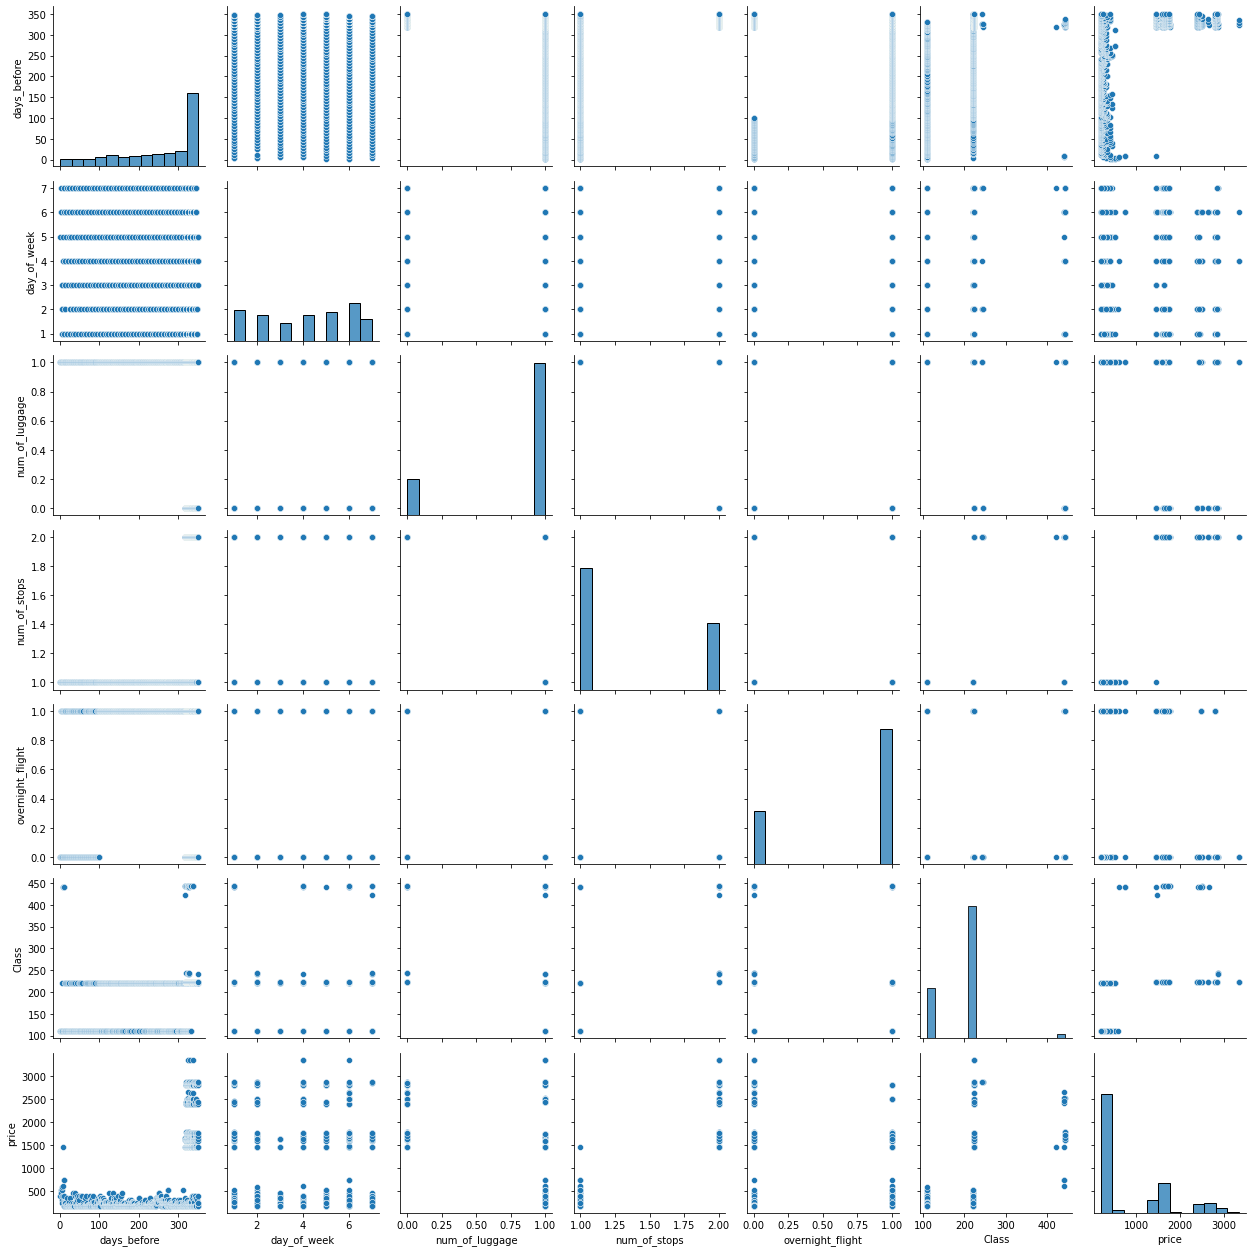

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 09:45:00,1900-01-01 15:05:00,1,5,1,1,0,110,390.09
1,1900-01-01 09:45:00,1900-01-01 15:05:00,2,6,1,1,0,110,447.09
2,1900-01-01 09:45:00,1900-01-01 10:25:00,2,6,1,1,1,110,512.09
3,1900-01-01 09:45:00,1900-01-01 15:05:00,3,7,1,1,0,110,447.09
4,1900-01-01 09:45:00,1900-01-01 10:25:00,4,1,1,1,1,110,297.09


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 09:45:00,1900-01-01 15:05:00,1,5,1,1,0,110,390.09,-2208953700000000000,-2208934500000000000
1,1900-01-01 09:45:00,1900-01-01 15:05:00,2,6,1,1,0,110,447.09,-2208953700000000000,-2208934500000000000
2,1900-01-01 09:45:00,1900-01-01 10:25:00,2,6,1,1,1,110,512.09,-2208953700000000000,-2208951300000000000
3,1900-01-01 09:45:00,1900-01-01 15:05:00,3,7,1,1,0,110,447.09,-2208953700000000000,-2208934500000000000
4,1900-01-01 09:45:00,1900-01-01 10:25:00,4,1,1,1,1,110,297.09,-2208953700000000000,-2208951300000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,5,1,1,1,0,110,390.09
1,6,2,1,1,0,110,447.09
2,6,2,1,1,1,110,512.09
3,7,3,1,1,0,110,447.09
4,1,4,1,1,1,110,297.09


In [21]:
df.to_csv('skg_lis_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [55]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9082209338726585


In [56]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9329541911376199


In [57]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9333597727736771


In [58]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    
}

dtr = DecisionTreeRegressor(random_state=0)

grid_tree = GridSearchCV(estimator=dtr, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1,)
                           
grid_tree.fit(X_train,y_train)

y_pred = grid_tree.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Accuracy score of the predictions: 0.9121449557706393


In [59]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9081928707853653


In [60]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9337389437623123


In [61]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.251215663065256


In [62]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6878492117258899


In [63]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
33/33 [==============================] - 2s 6ms/step - loss: 585086.0000 - val_loss: 1280297.1250
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 453127.5312 - val_loss: 1234837.2500
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 444189.3125 - val_loss: 1137723.5000
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 437490.4688 - val_loss: 948513.5000
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 413745.0938 - val_loss: 902553.0000
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 386264.6250 - val_loss: 916340.7500
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 369855.0625 - val_loss: 666364.3125
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 343206.3125 - val_loss: 711943.1250
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 315680.8750 - val_loss: 740128.1250
Epoch 10/200
33/

Epoch 150/200
33/33 [==============================] - 0s 4ms/step - loss: 75731.1953 - val_loss: 262482.2500
Epoch 151/200
33/33 [==============================] - 0s 4ms/step - loss: 68676.4844 - val_loss: 258256.8594
Epoch 152/200
33/33 [==============================] - 0s 4ms/step - loss: 75070.1797 - val_loss: 255038.2188
Epoch 153/200
33/33 [==============================] - 0s 4ms/step - loss: 68805.6406 - val_loss: 259522.4688
Epoch 154/200
33/33 [==============================] - 0s 4ms/step - loss: 74870.7969 - val_loss: 328039.8438
Epoch 155/200
33/33 [==============================] - 0s 4ms/step - loss: 72238.2578 - val_loss: 298742.4375
Epoch 156/200
33/33 [==============================] - 0s 4ms/step - loss: 69690.1328 - val_loss: 306114.1250
Epoch 157/200
33/33 [==============================] - 0s 4ms/step - loss: 69113.1016 - val_loss: 245036.2500
Epoch 158/200
33/33 [==============================] - 0s 5ms/step - loss: 74560.7109 - val_loss: 251468.7500
Epoch 159/

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.8766283795447499


In [64]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 638536.0625 - val_loss: 1148110.7500
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 453430.9062 - val_loss: 1248879.2500
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 447469.5312 - val_loss: 1121213.8750
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 444347.1562 - val_loss: 1174753.2500
Epoch 5/200
33/33 [==============================] - 0s 5ms/step - loss: 450432.4375 - val_loss: 1107676.0000
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 432267.2812 - val_loss: 1217811.5000
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 424454.5625 - val_loss: 1007107.8125
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 411577.9375 - val_loss: 956492.6875
Epoch 9/200
33/33 [==============================] - 0s 5ms/step - loss: 390870.0000 - val_loss: 1202502.0000
Epoch 10/20

Epoch 150/200
33/33 [==============================] - 0s 4ms/step - loss: 68225.2266 - val_loss: 262016.2500
Epoch 151/200
33/33 [==============================] - 0s 4ms/step - loss: 70926.7109 - val_loss: 245548.6250
Epoch 152/200
33/33 [==============================] - 0s 4ms/step - loss: 65100.5078 - val_loss: 257437.8438
Epoch 153/200
33/33 [==============================] - 0s 4ms/step - loss: 68211.4375 - val_loss: 268287.0625
Epoch 154/200
33/33 [==============================] - 0s 4ms/step - loss: 69340.3984 - val_loss: 258219.0469
Epoch 155/200
33/33 [==============================] - 0s 4ms/step - loss: 68260.9609 - val_loss: 241537.6094
Epoch 156/200
33/33 [==============================] - 0s 4ms/step - loss: 67805.2578 - val_loss: 256945.2344
Epoch 157/200
33/33 [==============================] - 0s 4ms/step - loss: 67531.3516 - val_loss: 295804.4375
Epoch 158/200
33/33 [==============================] - 0s 4ms/step - loss: 66196.3125 - val_loss: 235896.9844
Epoch 159/

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.8779647637254684


In [65]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
33/33 [==============================] - 0s 7ms/step - loss: 685686.9375 - val_loss: 1070674.6250
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 448531.4062 - val_loss: 1117834.6250
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 446108.0312 - val_loss: 1254366.8750
Epoch 4/200
33/33 [==============================] - 0s 5ms/step - loss: 442141.7500 - val_loss: 1149969.6250
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 440201.2812 - val_loss: 913984.8125
Epoch 6/200
33/33 [==============================] - 0s 5ms/step - loss: 441113.3125 - val_loss: 1226621.5000
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 417453.7500 - val_loss: 1088080.7500
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 402081.5312 - val_loss: 758535.4375
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 377960.9375 - val_loss: 1030218.8125
Epoch 10/200

33/33 [==============================] - 0s 4ms/step - loss: 73307.4219 - val_loss: 410309.0312
Epoch 150/200
33/33 [==============================] - 0s 4ms/step - loss: 72346.6875 - val_loss: 290808.0000
Epoch 151/200
33/33 [==============================] - 0s 4ms/step - loss: 79370.5547 - val_loss: 298956.9062
Epoch 152/200
33/33 [==============================] - 0s 4ms/step - loss: 72108.0391 - val_loss: 332639.4688
Epoch 153/200
33/33 [==============================] - 0s 4ms/step - loss: 73586.3047 - val_loss: 296627.4375
Epoch 154/200
33/33 [==============================] - 0s 5ms/step - loss: 72141.0156 - val_loss: 282528.1250
Epoch 155/200
33/33 [==============================] - 0s 4ms/step - loss: 84558.2734 - val_loss: 299597.0625
Epoch 156/200
33/33 [==============================] - 0s 4ms/step - loss: 88755.9766 - val_loss: 296435.5938
Epoch 157/200
33/33 [==============================] - 0s 5ms/step - loss: 72683.0312 - val_loss: 300082.4375
Epoch 158/200
33/33 [===

In [66]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
33/33 [==============================] - 1s 10ms/step - loss: 503656.5625 - val_loss: 1055869.0000
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 477183.6875 - val_loss: 874539.1875
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 457348.2500 - val_loss: 998627.7500
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 431849.9062 - val_loss: 1198403.0000
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 408224.5938 - val_loss: 1015725.1250
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 379591.9062 - val_loss: 940045.2500
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 376087.8438 - val_loss: 737641.6875
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 333151.9375 - val_loss: 655154.7500
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 316031.1875 - val_loss: 724213.3750
Epoch 10/200
33

Epoch 76/200
33/33 [==============================] - 0s 4ms/step - loss: 73626.6172 - val_loss: 244325.6562
Epoch 77/200
33/33 [==============================] - 0s 4ms/step - loss: 71678.1875 - val_loss: 243937.6406
Epoch 78/200
33/33 [==============================] - 0s 4ms/step - loss: 72899.6875 - val_loss: 262163.4375
Epoch 79/200
33/33 [==============================] - 0s 5ms/step - loss: 71180.2188 - val_loss: 256332.5938
Epoch 80/200
33/33 [==============================] - 0s 4ms/step - loss: 68995.3281 - val_loss: 257729.1250
Epoch 81/200
33/33 [==============================] - 0s 4ms/step - loss: 81540.3906 - val_loss: 295584.2500
Epoch 82/200
33/33 [==============================] - 0s 4ms/step - loss: 81323.0000 - val_loss: 253210.2500
Epoch 83/200
33/33 [==============================] - 0s 4ms/step - loss: 72540.9141 - val_loss: 254239.2031
Epoch 84/200
33/33 [==============================] - 0s 4ms/step - loss: 79334.0156 - val_loss: 269311.0938
Epoch 85/200
33/33 

In [67]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet34',res18_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 934071.7500 - val_loss: 2599145.2500
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 512929.7500 - val_loss: 1248139.1250
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 445380.3750 - val_loss: 987367.2500
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 444084.8750 - val_loss: 1076203.6250
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 435892.2500 - val_loss: 1214775.0000
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 434254.8125 - val_loss: 1134888.3750
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 423045.5625 - val_loss: 1086009.5000
Epoch 8/200
33/33 [==============================] - 0s 5ms/step - loss: 404946.4375 - val_loss: 877686.1875
Epoch 9/200
33/33 [==============================] - 0s 5ms/step - loss: 391658.5312 - val_loss: 884566.8125
Epoch 10/200


33/33 [==============================] - 0s 4ms/step - loss: 79111.8203 - val_loss: 311823.8438
Epoch 150/200
33/33 [==============================] - 0s 5ms/step - loss: 84450.1797 - val_loss: 284891.8438
Epoch 151/200
33/33 [==============================] - 0s 4ms/step - loss: 76726.1484 - val_loss: 494230.2812
Epoch 152/200
33/33 [==============================] - 0s 4ms/step - loss: 83076.9453 - val_loss: 297164.8438
Epoch 153/200
33/33 [==============================] - 0s 4ms/step - loss: 78800.8594 - val_loss: 271913.2500
Epoch 154/200
33/33 [==============================] - 0s 4ms/step - loss: 75425.4453 - val_loss: 277426.7812
Epoch 155/200
33/33 [==============================] - 0s 5ms/step - loss: 76314.5625 - val_loss: 273545.2188
Epoch 156/200
33/33 [==============================] - 0s 4ms/step - loss: 78218.7109 - val_loss: 282341.5938
Epoch 157/200
33/33 [==============================] - 0s 4ms/step - loss: 78910.6562 - val_loss: 264336.3125
Epoch 158/200
33/33 [===

In [68]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
33/33 [==============================] - 1s 12ms/step - loss: 482000.0625 - val_loss: 1119570.0000
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 439344.1875 - val_loss: 1448909.5000
Epoch 3/200
33/33 [==============================] - 0s 6ms/step - loss: 441724.6250 - val_loss: 777583.8750
Epoch 4/200
33/33 [==============================] - 0s 5ms/step - loss: 354037.7188 - val_loss: 750032.7500
Epoch 5/200
33/33 [==============================] - 0s 5ms/step - loss: 353432.5000 - val_loss: 1022843.1250
Epoch 6/200
33/33 [==============================] - 0s 5ms/step - loss: 286724.3125 - val_loss: 770983.0000
Epoch 7/200
33/33 [==============================] - 0s 5ms/step - loss: 282398.9062 - val_loss: 761723.7500
Epoch 8/200
33/33 [==============================] - 0s 5ms/step - loss: 274563.4375 - val_loss: 644106.9375
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 254853.3438 - val_loss: 864967.3125
Epoch 10/200
33

Epoch 76/200
33/33 [==============================] - 0s 5ms/step - loss: 76124.0781 - val_loss: 254754.6719
Epoch 77/200
33/33 [==============================] - 0s 5ms/step - loss: 68115.1719 - val_loss: 308946.6875
Epoch 78/200
33/33 [==============================] - 0s 5ms/step - loss: 75934.6016 - val_loss: 248971.4844
Epoch 79/200
33/33 [==============================] - 0s 5ms/step - loss: 81576.7188 - val_loss: 339386.8750
Epoch 80/200
33/33 [==============================] - 0s 5ms/step - loss: 75691.2422 - val_loss: 315010.1250
Epoch 81/200
33/33 [==============================] - 0s 5ms/step - loss: 82162.0312 - val_loss: 276441.4688
Epoch 82/200
33/33 [==============================] - 0s 4ms/step - loss: 71943.5312 - val_loss: 238942.8906
Epoch 83/200
33/33 [==============================] - 0s 5ms/step - loss: 81542.7969 - val_loss: 247406.7969
Epoch 84/200
33/33 [==============================] - 0s 5ms/step - loss: 71901.0234 - val_loss: 245526.7656
Epoch 85/200
33/33 

In [69]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [70]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [71]:
result

,ML Model,R2-Score
0,AdaBoost,0.908
1,Bagging,0.933
2,Gradient Boosting,0.933
3,Decision Tree,0.912
4,Random Forest,0.908
5,Extra Tree,0.934
6,SVR,0.250
7,MLP,0.688
8,VGG11,0.877
9,VGG13,0.878


# Graph

In [72]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

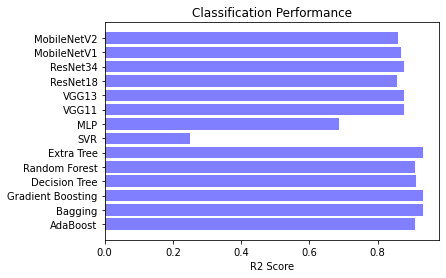

In [73]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()